In [1]:
# Getting rid of unnecessary warnings
import warnings
from matplotlib.cbook import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

# Importing standard Qiskit libraries
import qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Useful to have pi
import math
pi=math.pi

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.13.1', 'qiskit-aqua': '0.9.1', 'qiskit': '0.26.2', 'qiskit-nature': '0.1.3', 'qiskit-finance': None, 'qiskit-optimization': '0.1.0', 'qiskit-machine-learning': None}

### X gate 

The X-gate is represented by the Pauli-X matrix: 

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

An X gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians. It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip.

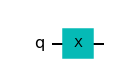

In [3]:
x_gate=QuantumCircuit(1) # Create a quantum circuit with 1 qubit
x_gate.x(0)
x_gate.draw(output='mpl')

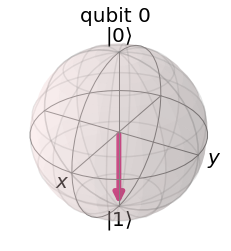

In [4]:
backend = Aer.get_backend('statevector_simulator')
result = execute(x_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### SX gate

The SX gate equates to a rotation around the X-axis of the Bloch sphere by $\pi/2$. It is called SX gate to indicate that it is the square-root of the X gate. Applying this gate twice produces the standard Pauli-X gate. The opposite of the SX is the SX dagger, which is a rotation by $\pi/2$ in the opposite direction.

$SX = \frac{1}{2}\begin{pmatrix}
1+i & 1-i \\
1-i & 1+i \\
\end{pmatrix}$

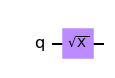

In [5]:
sx_gate = QuantumCircuit(1)
sx_gate.sx(0)  
sx_gate.draw(output='mpl')

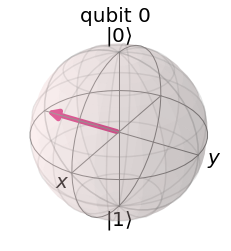

In [6]:
backend = Aer.get_backend('statevector_simulator')
result = execute(sx_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### RZ gate

The Rz gate performs a rotation of $\phi$ around the Z-axis direction (Where $\phi$ is a real number). It has the matrix below:

$RZ = \begin{pmatrix}
1 & 0 \\
0 & e ^{i \phi } \\
\end{pmatrix}$

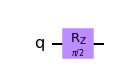

In [7]:
rz_gate = QuantumCircuit(1)
rz_gate.rz(pi/2, 0)
rz_gate.draw(output='mpl')

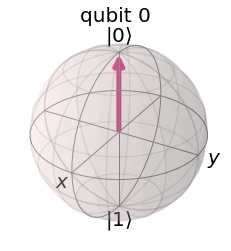

In [8]:
backend = Aer.get_backend('statevector_simulator')
result = execute(rz_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

Since the rotation is around the Z-axis one would not see a difference when we apply it to the default state $|0\rangle$, so we use the state which was generated by applying the SX gate instead and apply the RZ to it.

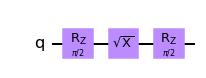

In [9]:
rz_gate.sx(0)
rz_gate.rz(pi/2, 0)
rz_gate.draw(output='mpl')

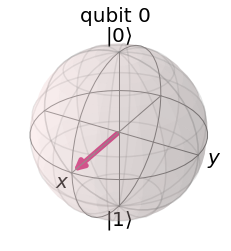

In [10]:
backend = Aer.get_backend('statevector_simulator')
result = execute(rz_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### Hadamard gate
A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the X-axis and Z-axis.
It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states. This state is also written as $|+\rangle$. What the Hadamard does is to transform between the $|0\rangle$ $|1\rangle$ and the $|+\rangle$ $|-\rangle$ base. 

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

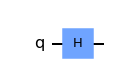

In [11]:
# Let's do an H-gate on a |0> qubit
h_gate = QuantumCircuit(1)
h_gate.h(0)
h_gate.draw(output='mpl')

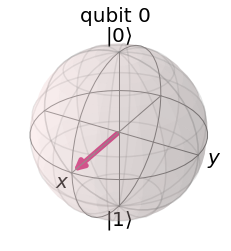

In [12]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(h_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### CX gate (CNOT gate)

The controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged. 

Note: Qiskit numbers the bits in a string from right to left.

$CX = \begin{pmatrix}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}$

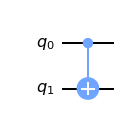

In [13]:
cx_gate = QuantumCircuit(2)
cx_gate.cx(0,1)
cx_gate.draw(output='mpl')

### CCX gate (Toffoli gate)

The CCX gate (controlled controlled X Gate) is also called a Toffoli gate. The CCX gate is a three-bit gate, with two controls and one target as their input and output. If the first two bits are in the state $|1\rangle$, it applies a Pauli-X (or NOT) on the third bit. Otherwise, it does nothing. 

Note: Qiskit numbers the bits in a string from right to left.

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}$

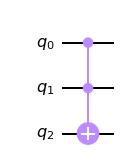

In [14]:
ccx_gate = QuantumCircuit(3)
ccx_gate.ccx(0,1,2)
ccx_gate.draw(output='mpl')

## Create logical gates with the help of quantum gates

### NOT gate

The NOT gate flips the value of a bit and, as was mentioned before, an X gate can be considered a NOT gate. The truth table for a NOT gate looks like this:

| Input | Output |
| --- | --- | 
| 1 | 0 |
| 0 | 1 |

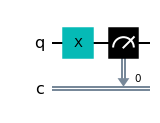

In [15]:
not_gate=QuantumCircuit(1,1) # Create a quantum circuit with 1 qubit and 1 classical bit
not_gate.x(0)
not_gate.measure(0,0)
not_gate.draw(output='mpl')

### AND gate

The output of an AND is true if and only if both inputs are true. The truth table for an AND Gate looks like this:

| A (Input) | B (Input) | Output |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

With a Toffoli gate, we can get the result of an AND gate by interpreting the two control bits as the input bits and the target bit as the output bit.

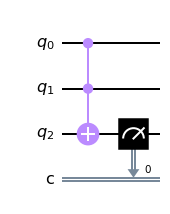

In [17]:
and_gate=QuantumCircuit(3,1) # Create a quantum circuit with 3 qubits and 1 classical bit
and_gate.ccx(0,1,2)
and_gate.measure(2,0)
and_gate.draw(output='mpl')

### OR gate

An OR gate returns true if at least one of the input gates is true.
The truth table for an OR Gate looks like this:

| A (Input) | B (Input) | Output |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

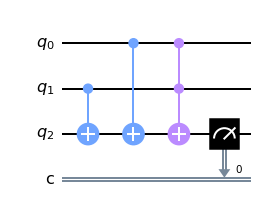

In [18]:
or_gate=QuantumCircuit(3,1) # Create a quantum circuit with 3 qubits and 1 classical bit
or_gate.cx(1,2)
or_gate.cx(0,2)
or_gate.ccx(0,1,2)
or_gate.measure(2,0)
or_gate.draw(output='mpl')

## Composite quantum gates and their cost

A real quantum computer normally does not have physical implementations of all gates. Instead they use a small set of base gates, which form a universal gate set, this is, similar to the classical case, a set of instructions which can be used to implement all possible operations.

For this reason, quantum circuits must be transpiled into basis gates before execution. This is usually done automatically by Qiskit transpiler when a quantum circuit is sent to a IBM Quantum system. But for the learning purposes, you are expected to construct the circuit by hand using the basis gates. The basis gates for IBM Quantum system is typically CX, ID, RZ, SX and X gates. You can see [`ibmq_mumbai` system](https://quantum-computing.ibm.com/services?skip=0&systems=all&system=ibmq_mumbai) for an example.

Now let’s  take a look at the circuit below:

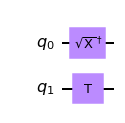

In [16]:
qc = QuantumCircuit(2)
qc.sxdg(0)
qc.t(1)
qc.draw(output='mpl')

Now lets show how a decomposition of the above circuit for a quantum computer, using only the base gates, could look.

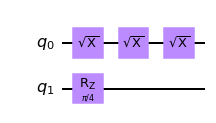

In [17]:
qc = QuantumCircuit(2)
qc.sx(0)
qc.sx(0)
qc.sx(0)
qc.rz(pi/4,1)
qc.draw(output='mpl')

As you can see, we now use only the base gates, but for this reason more total gates are used. The more gates a circuit has, the more complex it is to run. So, when we want to calculate the cost of a circuit, we consider the number of gates used. However, not all gates are considered equal expensive, so when we calculate the cost of a circuit, we use the following formula:

$$
Cost = 10 N_{CNOT} + N_{other}
$$

where $N_{CNOT}$ is the number of CNOT gate and $N_{other}$ is the number of other gates.

### Hadamard gate

As said all operations can be expressed just using the base gates. As an example we show how to construct a Hadamard gate using our base gate set. We don't have a base gate which does a direct rotation around the axis that is in the middle of the X-axis and Z-axis, so we instead use rotations around the X-axis and Z-axis to get the same result. 

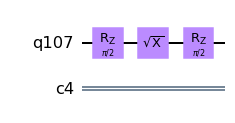

In [44]:
q=QuantumRegister(1)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)
qc.rz(pi/2, 0)
qc.sx(0)
qc.rz(pi/2, 0)
qc.draw(output='mpl')

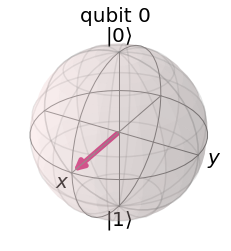

In [45]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

As you might remember, this is the circuit we had above, when we visualized the rotation of the RZ gate. Above we saw that the first RZ does nothing, when we are in the $|0\rangle$ or $|1\rangle$ states. So it might feel a bit useless. However, if we are in the $|+\rangle$ and $|-\rangle$ states the first rotation has an effect. We have the opposite scenario, since after applying the SX gate we are again in the $|0\rangle$ or $|1\rangle$ state and then the second RZ has no effect.

### Controlled rotation

We have seen above the Controlled NOT, lets now show one example on how one can build a controlled rotation around the Y-axis. The rotation $\theta$ can be any rotation, it does not have to be $\pi$, this is just an example. 

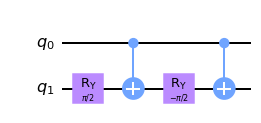

In [18]:
qc = QuantumCircuit(2)
theta = pi # Theta can be anything (pi chosen arbitrarily)
#qc.x(0)
qc.ry(theta/2,1)
qc.cx(0,1)
qc.ry(-theta/2,1)
qc.cx(0,1)
qc.draw(output='mpl')

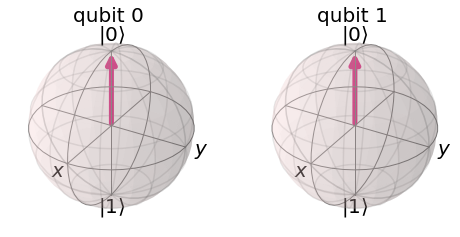

In [19]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

When one goes through this circuit, one can see that if the first qubit is 0 then the two rotations cancel each other out and nothing happens. 

On the other hand, if the first qubit is 1 we will get a state which is equal to applying the rotation $\theta / 2$ two times which forms our initial rotation $\theta$. This works since the X-axis and Y-axis are orthogonal. 

### Controlled controlled rotation

Above we saw an example on how one can do a controlled rotation around the $Y$-axis.
Now we assume we have a controlled rotation (around the axis we want) and want to build from that a double controlled rotation, which is only applied if both control qubits are 1 similar to the CCX gate.

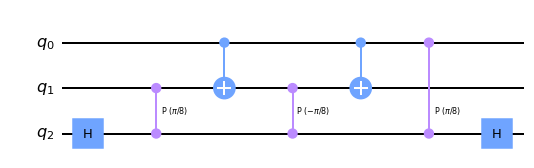

In [20]:
qc = QuantumCircuit(3)
theta = pi/4 # Theta can be anything (pi/4 chosen arbitrarily)
#qc.x(0)
#qc.x(1)
qc.h(2)
qc.cp(theta/2,1,2)
qc.cx(0,1)
qc.cp(-theta/2,1,2)
qc.cx(0,1)
qc.cp(theta/2,0,2)
qc.h(2)
qc.draw()

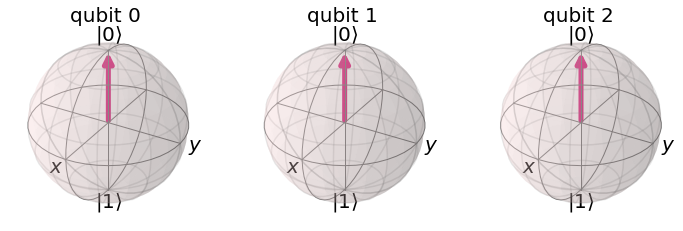

In [21]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

In this circuit if both the first and second qubit are 0, then nothing happens at all. If only the second qubit is one, first we apply a rotation by $\pi/2$ and afterwards a rotation by $-\pi/2$ which cancel each other out. If only the first qubit is 1, then we the second qubit will also be one after the first CX so a rotation by $-\pi/2$ will be applied and afterwards a rotation by $\pi/2$ will be applied and these two rotations cancel each other out again.

If both the first and the second qubit are 1 then first there will be a rotation by $\pi/2$ then the second qubit will become 0 so the next rotation does not apply and then it is flipped back to 1. Afterwards another rotation by $\pi/2$ is applied since the first qubit is 1. So we have two times a rotation of $\pi/2$ which form together a rotation of $\pi$.

## The problem: Toffoli gate

<div id='problem'></div>
<div class="alert alert-block alert-success">

We have seen above how to construct a Hadamard gate with our base set, and now we want to build a Toffoli gate as well. Why the Toffoli gate? As mentioned above, the Toffoli gate is also a universal gate for classical computation the same way the NAND gate is, but it is reversible. Further  it builds a simple universal gate set for quantum computation if combined with the Hadamard gate. 

We have seen some examples on how to express more complex gates using basis gates, we now want to use the knowledge gained to construct a Toffoli gate only using our basis gates.
    
</div>


<div class="alert alert-block alert-danger">

As a reminder the basis gates for IBM Quantum systems are CX, RZ, SX and X gates, so no other gates are allowed.

Of course we want also try to minimize the cost. 
    
$$
Cost = 10 N_{CNOT} + N_{other}
$$
    
</div>


In [22]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

circuit = QuantumCircuit(3)


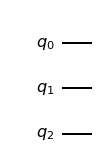

In [23]:
circuit.draw(output='mpl')

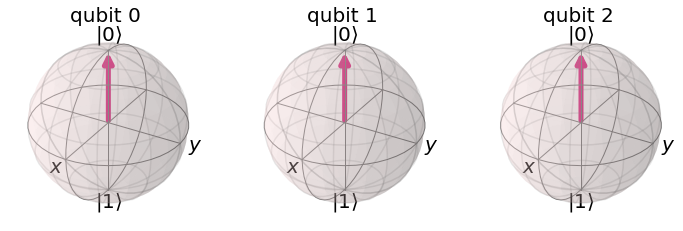

In [24]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

# The problem: Fredkin gate construction

### CSWAP gate (Fredkin gate)

The CSWAP gate (controlled SWAP Gate) is also called a Fredkin gate. The CSWAP gate is a three-bit gate, with one control and two targets as its input and output. If the first bit is in the state $|1\rangle$, it applies a SWAP on the two other bits. Otherwise, it does nothing. 

Note: Qiskit numbers the bits in a string from right to left.

$CSWAP = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}$

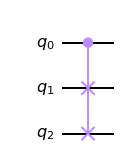

In [27]:
qc = QuantumCircuit(3)
qc.cswap(0, 1, 2)

qc.draw(output='mpl')

### Problems

(1) Give a quantum circuit which uses three Toffoli gates to construct the
Fredkin gate

(2) Show that the ﬁrst and last Toffoli gates can be replaced by CNOT gates

(3) Now replace the middle Toffoli gate with the circuit for Toffoli gate decomposition to obtain
a Fredkin gate construction

## (1) Give a quantum circuit which uses three Toffoli gates to construct the Fredkin gate

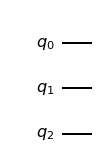

In [4]:
qc = QuantumCircuit(3)


qc.draw(output='mpl')

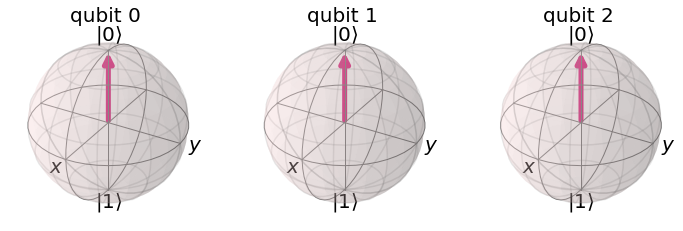

In [30]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

## (2) Show that the ﬁrst and last Toffoli gates can be replaced by CNOT gates

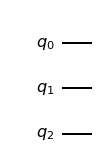

In [6]:
qc = QuantumCircuit(3)


qc.draw(output='mpl')

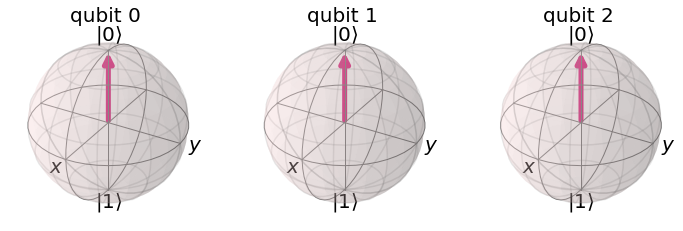

In [28]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

## (3) Now replace the middle Toffoli gate with the circuit for Toffoli gate decomposition to obtain a Fredkin gate construction

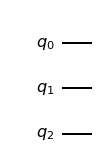

In [8]:
qc = QuantumCircuit(3)


qc.draw(output='mpl')

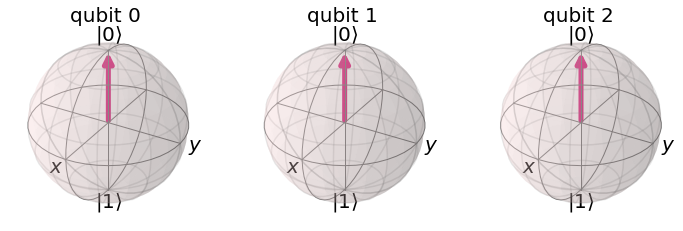

In [29]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)